<a href="https://colab.research.google.com/github/daniel-usp/USP/blob/main/Copy_of_Projeto_KNN_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = green> Caso sobre KNN

Bem-vindo ao Projeto de KNN!
## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

## Obtenha os dados
** Leia o arquivo csv 'KNN_Project_Data' em um DataFrame **

In [ ]:
import pandas as pd

url = 'https://github.com/daniel-usp/MachineLearning/raw/main/05%20-%20KNN/varejo1.xlsx'  # Ensure this is the correct URL

dados = pd.read_excel(url)

dados




,pagamento,solteiro,idade,mulher
0,1,0,20,0
1,1,0,34,1
2,1,0,21,1
3,1,0,22,1
4,1,0,22,1
...,...,...,...,...
175,0,1,20,0
176,0,1,23,0
177,0,1,18,0
178,0,0,24,1


** Verifique o cabeçalho do DataFrame.**

In [ ]:
dados.head()

,pagamento,solteiro,idade,mulher
0,1,0,20,0
1,1,0,34,1
2,1,0,21,1
3,1,0,22,1
4,1,0,22,1


# Análise exploratória de dados

Uma vez que esses dados são artificiais, vamos criar um grande pairplot com o Seaborn.

** Use seaborn no DataFrame para criar um pairplot com a tonalidade indicada pela coluna y. **

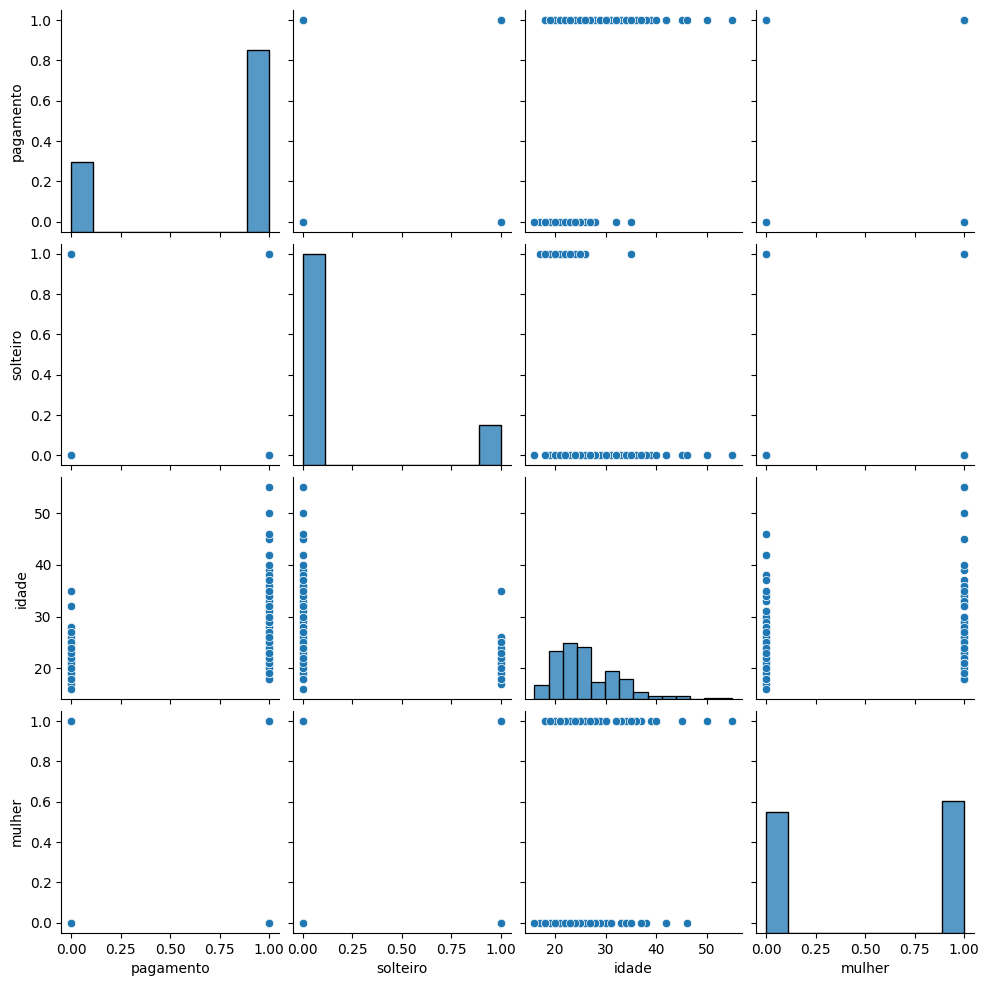

In [ ]:
import seaborn as sns
sns.pairplot(dados)

# Padronize as variáveis

Hora de para padronizar as variáveis.

** Import StandardScaler do Scikit-learn. **

In [ ]:
from sklearn.preprocessing import StandardScaler


** Crie um objeto StandardScaler() chamado scaler. **

In [ ]:
scaler = StandardScaler()

** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **

In [ ]:
#Definir X e y no dataframe dados
y = dados['pagamento']
X = dados.drop('pagamento', axis =1)

#Colunas de X que são categóricas
is_dummy = X.nunique() == 2
dummy_columns = X.columns[is_dummy]

#Padronização das features X com StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

scaled_features = pd.DataFrame(scaled_features, columns=X.columns)
scaled_features[dummy_columns] = dados[dummy_columns]
scaled_features


,solteiro,idade,mulher
0,0,-0.977056,0
1,0,1.225253,1
2,0,-0.819748,1
3,0,-0.662441,1
4,0,-0.662441,1
...,...,...,...
175,1,-0.977056,0
176,1,-0.505133,0
177,1,-1.291672,0
178,0,-0.347825,1


# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.20)

# Usando o KNN

** Importe o KNeighborClassifier do scikit learn. **

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

** Crie uma instância do modelo KNN com n_neighbors = 1 **

In [ ]:
#Número de Vizinhos (k)
k = 7
knn = KNeighborsClassifier(n_neighbors=k)

** Ajuste este modelo KNN aos dados de treinamento. **

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

** Use o método de previsão para prever valores usando seu modelo KNN e X_test. **

In [ ]:
prediction = knn.predict(X_test)
prediction

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

** Crie uma matriz de confusão e um relatório de classificação. **

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,prediction))

[[ 7  6]
 [ 1 22]]


In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.79      0.96      0.86        23

    accuracy                           0.81        36
   macro avg       0.83      0.75      0.76        36
weighted avg       0.82      0.81      0.79        36



# Escolhendo o valor K
Vamos continuar usando o método do cotovelo para escolher um bom valor K!

** Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa. **

In [ ]:
#Gráfico Otimizado do vizinho ótimo

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def errors(X,y):
  X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.20, random_state = 42)
  errors = []
  for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = (y_pred != y_test).mean()
    errors.append(error)
  return errors

def plot(X,y):

  error_rates = errors(X,y)

  # Plotting the error rates for odd values of K
  k_values = list(range(1, 16, 2))
  fig = go.Figure(data=go.Scatter(x=k_values, y=error_rates, mode='lines+markers'))
  fig.update_layout(title='Average Error Rate for Different K',
                    xaxis_title='Number of Neighbors (K)',
                    yaxis_title='Error Rate', xaxis=dict(
                        tickmode='array',
                        tickvals=k_values,
                        dtick=2))

  fig.update_traces(marker=dict(color='red', size=8),
                    line=dict(color='blue', dash='dash'))


  # Find the index of the minimum error rate
  min_error_idx = np.argmin(error_rates)
  min_error_k = k_values[min_error_idx]
  min_error_rate = error_rates[min_error_idx]

  # Add a scatter marker at the point of minimum error rate
  # Add a scatter marker at the point of minimum error rate
  fig.add_trace(go.Scatter(
      x=[min_error_k],
      y=[min_error_rate],
      mode='markers',
      marker=dict(color='black', size=18, symbol='star'),
      showlegend=False
  ))

  return fig.show()


** Agora crie o seguinte gráfico usando as informações do seu loop. **

In [ ]:
plot(X,y)

## Treine seu modelo novamente com novo valor K

** Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão. **

In [ ]:
n_neighbors = 7

In [ ]:
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
prediction = knn.predict(X_test)
prediction

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.79      0.96      0.86        23

    accuracy                           0.81        36
   macro avg       0.83      0.75      0.76        36
weighted avg       0.82      0.81      0.79        36

